# Exercise: Wake Deflection

In this exercise you can investigate the wake-deflection effects of yaw-misalignment.

**Install PyWake if needed**

In [1]:
# Install PyWake if needed
try:
    import py_wake
except ModuleNotFoundError:
    !pip install git+https://gitlab.windenergy.dtu.dk/TOPFARM/PyWake.git

**Import Python elements and PyWake objects**

In [4]:
# setup site, wind turbines and wind farm model with the corresponding wake models
import numpy as np
from ipywidgets import interact
from ipywidgets import IntSlider
import matplotlib.pyplot as plt

from py_wake.flow_map import HorizontalGrid
from py_wake.examples.data.iea37._iea37 import IEA37Site, IEA37_WindTurbines
from py_wake.literature.gaussian_models import Bastankhah_PorteAgel_2014
from py_wake.deflection_models.jimenez import JimenezWakeDeflection

**Specify site to use, as well as wind turbines to set up the wind farm model**

In [5]:
site = IEA37Site(16)
x, y = [0, 600, 1200], [0, 0, 0] 
windTurbines = IEA37_WindTurbines()
wfm = Bastankhah_PorteAgel_2014(site, windTurbines, deflectionModel=JimenezWakeDeflection())

In [6]:
# define function that plots the flow field and AEP history of 3 wind turbines
def plot_flow_field_and_aep(WT0, WT1):
    
    ax1 = plt.figure(figsize=(20,4)).gca()
    ax2 = plt.figure(figsize=(10,3)).gca()
    
    sim_res = wfm(x, y, yaw=np.reshape([WT0,WT1,0],(3,1,1)), wd=270, ws=10)
    sim_res.flow_map(HorizontalGrid(x = np.linspace(0,1400,200), y=np.linspace(-200,200,50))).plot_wake_map(ax=ax1)
    ax1.set_xlim([-200,1400])
    aep.append(sim_res.aep().values[:,0,0])
    aep_arr = np.array(aep)                                     
    for i in range(3):
        ax2.plot(aep_arr[:,i], '.-', label='WT%d, %.2f'%(i,aep_arr[-1,i]))
    ax2.plot(aep_arr.sum(1), '.-', label='Total, %.2f'%aep_arr[-1].sum())
    ax2.axhline(aep_arr[0].sum(),ls='--',c='r')
    ax2.set_ylabel('AEP [GWh]')
    ax2.set_xlabel('Iteration')
    ax2.legend(loc='upper left')

**Move the sliders above and try to find the optimal yaw-misalignment of WT0 and WT1 with respect to total AEP**

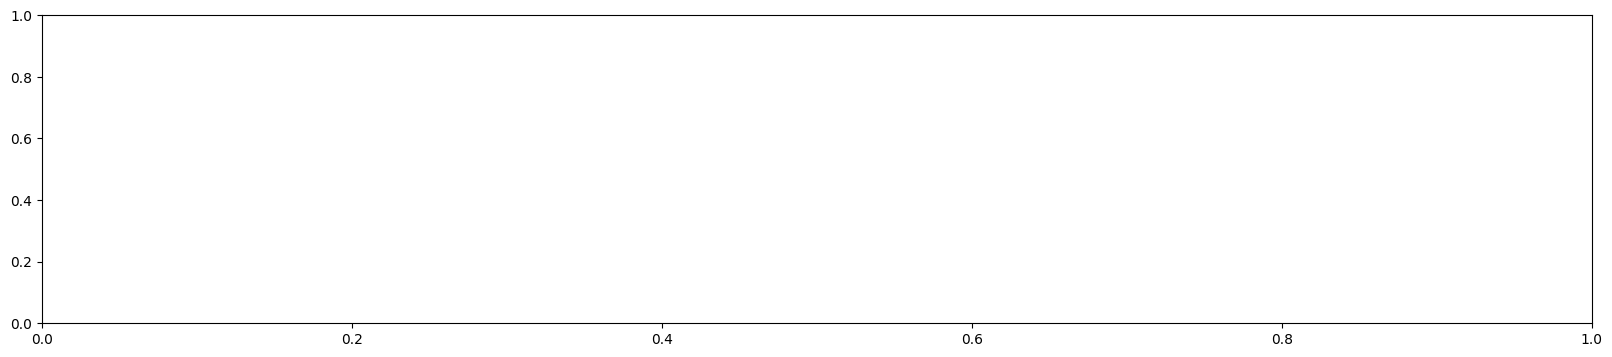

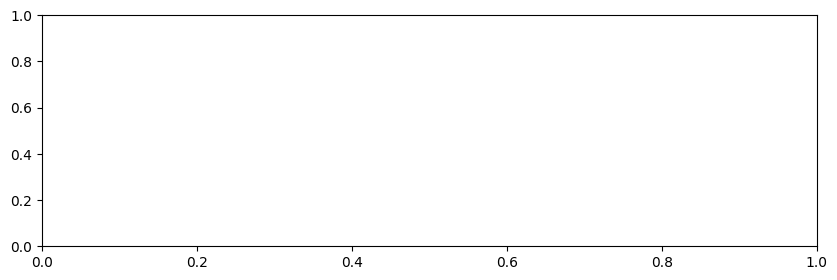

interactive(children=(IntSlider(value=0, continuous_update=False, description='WT0', max=50, min=-50), IntSlid…

In [7]:
# Run the plot_flow_field_and_aep function when moving the sliders
aep = []
_ = interact(plot_flow_field_and_aep, 
             WT0=IntSlider(min=-50, max=50, step=1, value=0, continuous_update=False),
             WT1=IntSlider(min=-50, max=50, step=1, value=0, continuous_update=False))